<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0701ESCoursera21685115-2022-01-01"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Agrupaciones <em>k</em>-means (Clustering)</font></h1>


## Introducción

Existen muchos modelos de agrupación. En este laboratorio representaremos el modelo considerado el mas simple de entre todos. A pesar de su simplicidad, *k*-means es muy usado para realizar agrupaciones en muchas aplicaciones de ciencia de datos, es especialmente util si usted necesita descubrir rapidamente cosas importantes en datos sin etiquetar.

Algunas aplicaciones reales de *k*-means incluyen:

*   segmentación de clientes
*   entender que tratan de hacer los visitantes de un sitio web
*   reconocimiento de patrones
*   compresión de información

En este laboratorio aprendera a agrupar usando *k*-means con 3 ejemplos:

*   usar *k*-means en un conjunto de datos generado aleatoriamente
*   usar *k*-means para la segmentación de clientes


## Indice

1.  <a href="https://#item1">Usar <em>k</em>-means en un conjunto de datos generado aleatoriamente</a>
2.  <a href="https://#item2">Usar <em>k</em>-means para la segmentación de clientes</a>


Antes de empezar con el contenido, descarguemos todas las dependencias necesarias.


In [27]:
import random # librería para generar números aleatorios
import numpy as np  # librería para manejar datos vectorizados
import pandas as pd # librería para procesar datos como dataframes 

import matplotlib.pyplot as plt # librería para graficar 
# backend para graficar diagramas en el explorador
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


## 1. *k*-means en un Conjunto de Datos Generado Aleatoriamente


Demostremos como *k*-means trabaja utilizando un ejemplo con datos diseñados


#### 30 puntos de datos pertenecientes a 2 distintas agrupaciones (x1 es la primer característica y x2 la segunda)


In [28]:
# datos
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined !¡Puntos de datos definidos!')

Datapoints defined !¡Puntos de datos definidos!


#### Definir una función que asigne cada dato a una agrupación


In [29]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('función de asignación_miembros definida!')

función de asignación_miembros definida!


#### Definir una función que actualice el centroide de cada agrupación


In [30]:
# actualizar la media 
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('función de asignación_miembros definida!')

función de asignación_miembros definida!


#### Deinir una función que grafique cada dato junto con los centroides de la agrupación


In [31]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # graficar la figura
    fig = plt.figure(figsize=(15, 10))  # crear un objeto figura 
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # definir las marcas
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # arreglar el eje horizontal
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # agregar etiquetas a las marcas
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # dar estilo a las marcas
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # añadir etiquetas a los ejes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # añadir un título a la figura
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('función plot_points definida!')

función plot_points definida!


#### Inicializar la gráfica de los puntos con *k*-means


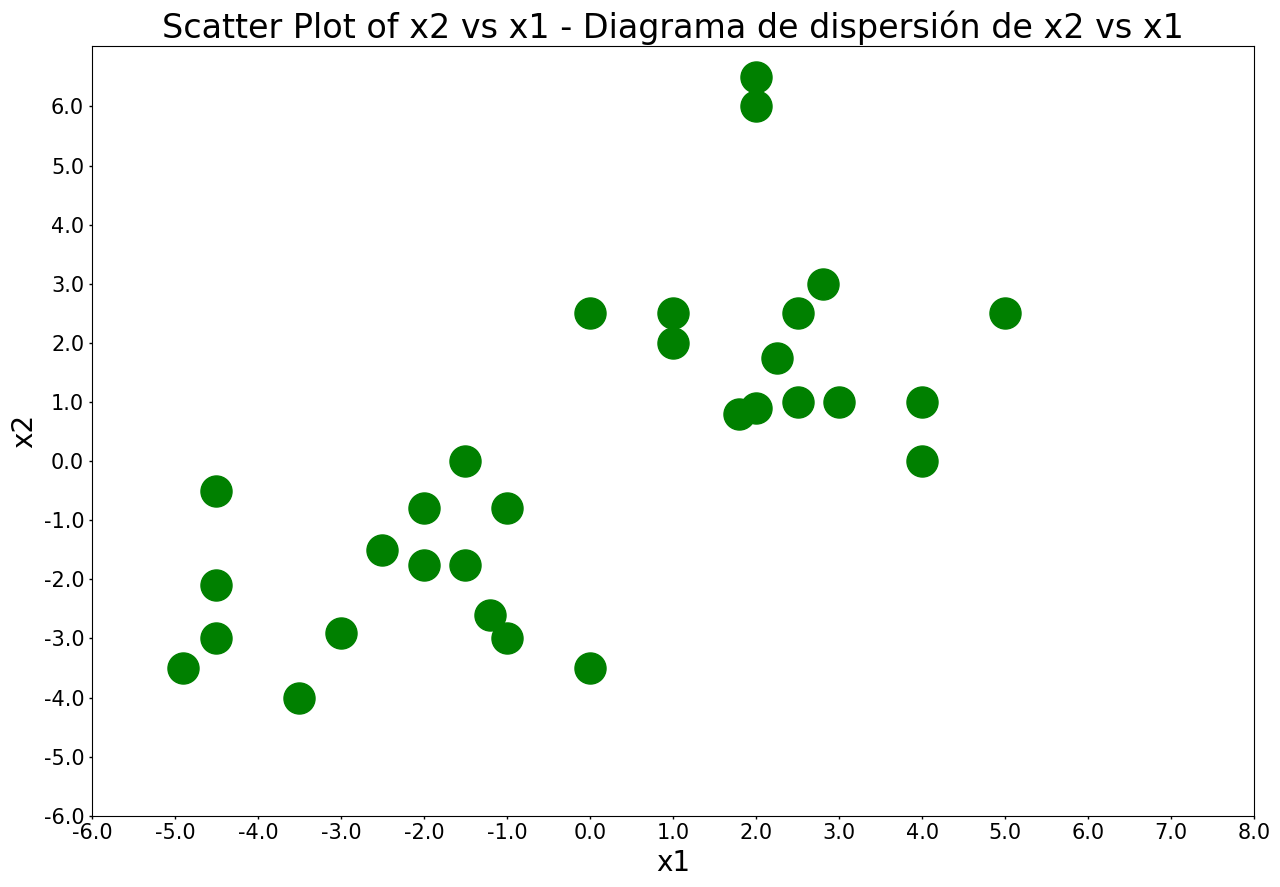

In [32]:
plot_points(figure_title='Scatter Plot of x2 vs x1 - Diagrama de dispersión de x2 vs x1')

#### Iniciar las agrupaciones definidas aleatoriamente con *k*-means y añadirlas a la gráfica


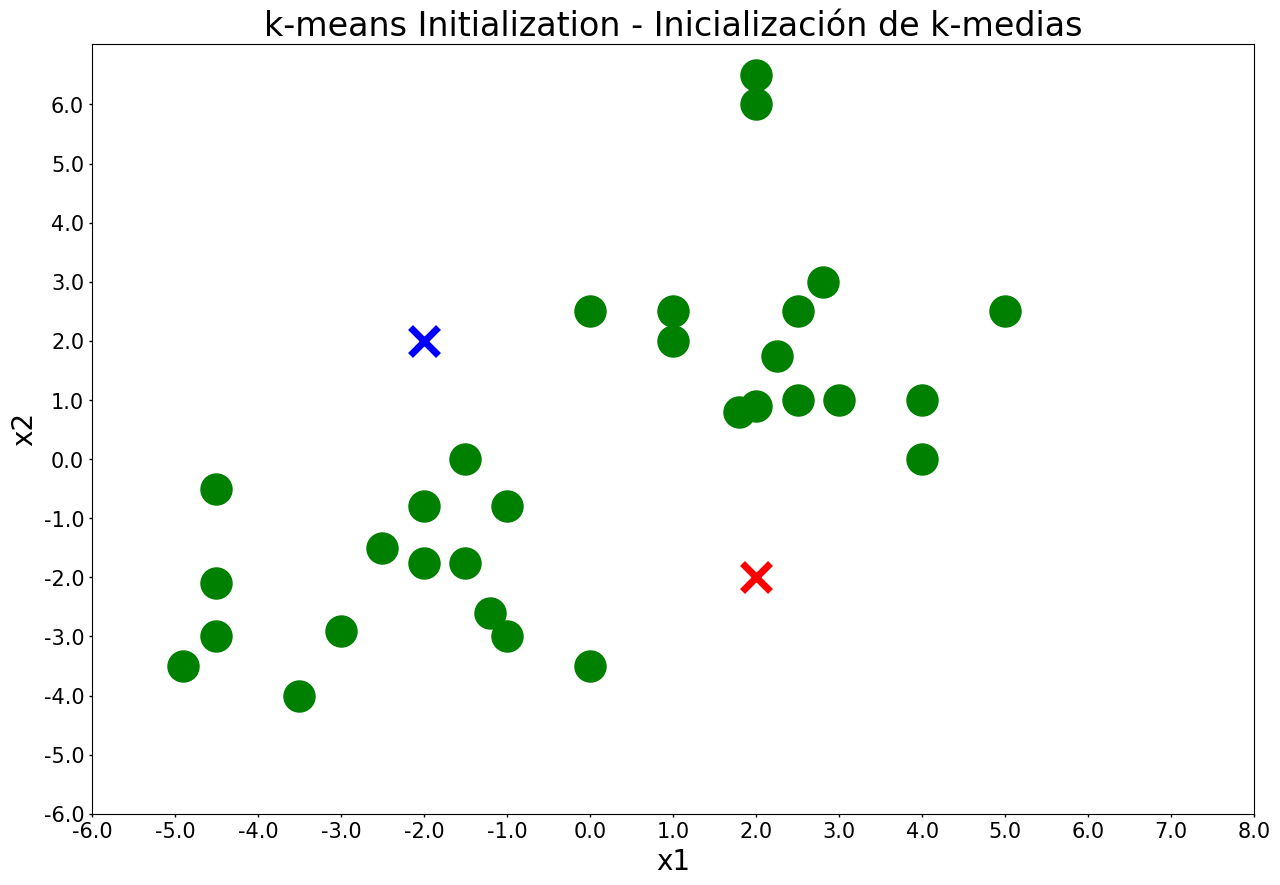

In [33]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization - Inicialización de k-medias')

#### Ejecutar *k*-means (4 iteraciones unicamente)


Iteration 1 - Presiona Enter para actualizar los miembros de cada clúster 


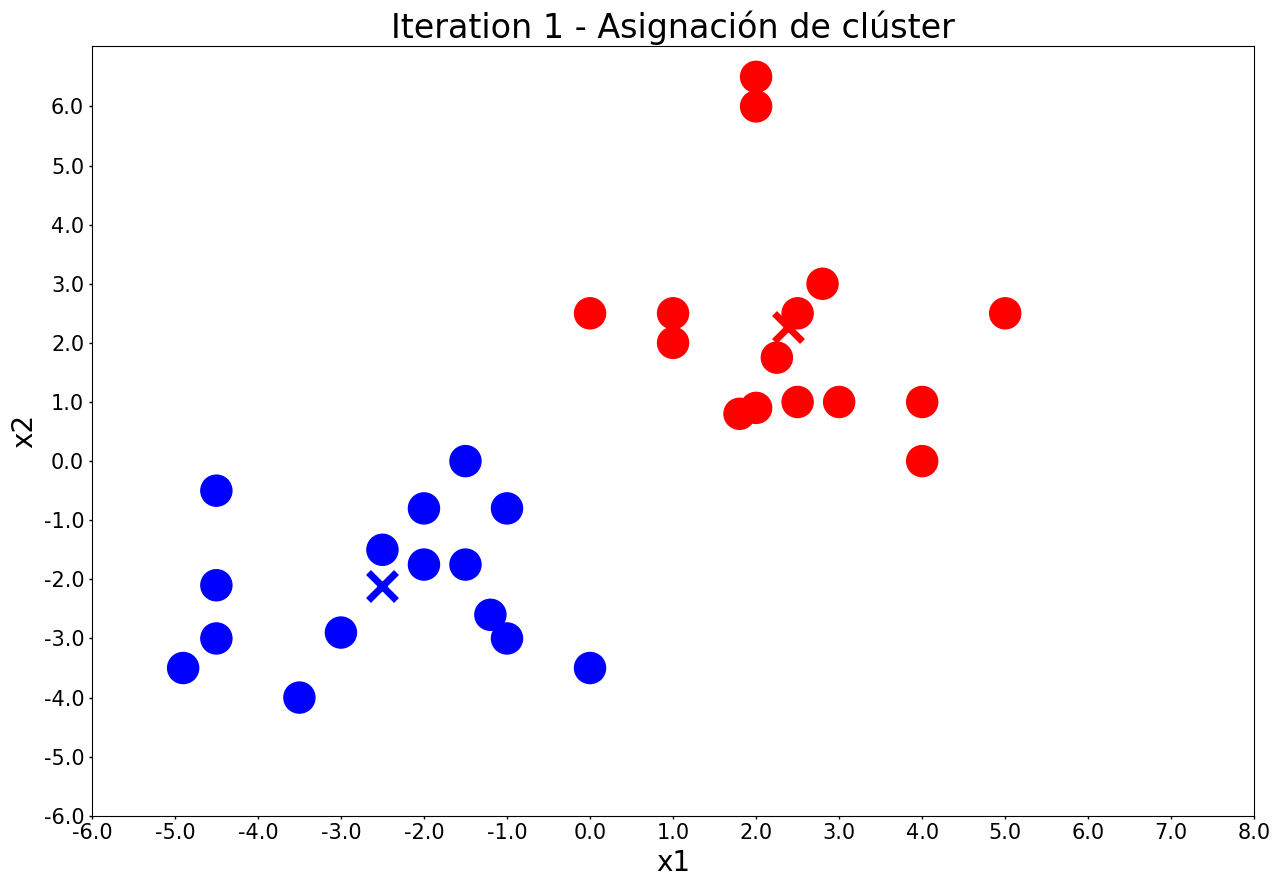

Iteration 1 - Presiona Enter para actualizar los centros 


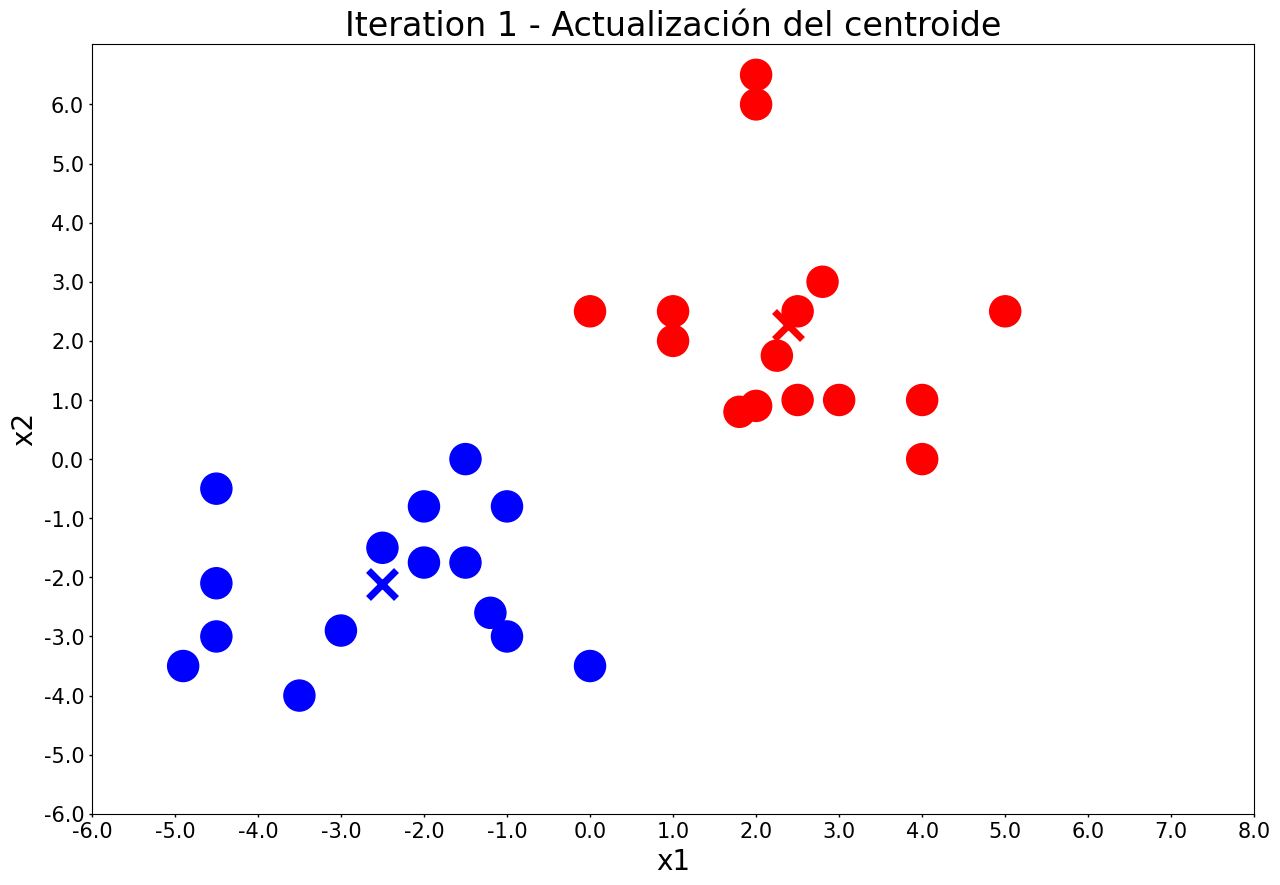

Iteration 2 - Presiona Enter para actualizar los miembros de cada clúster 


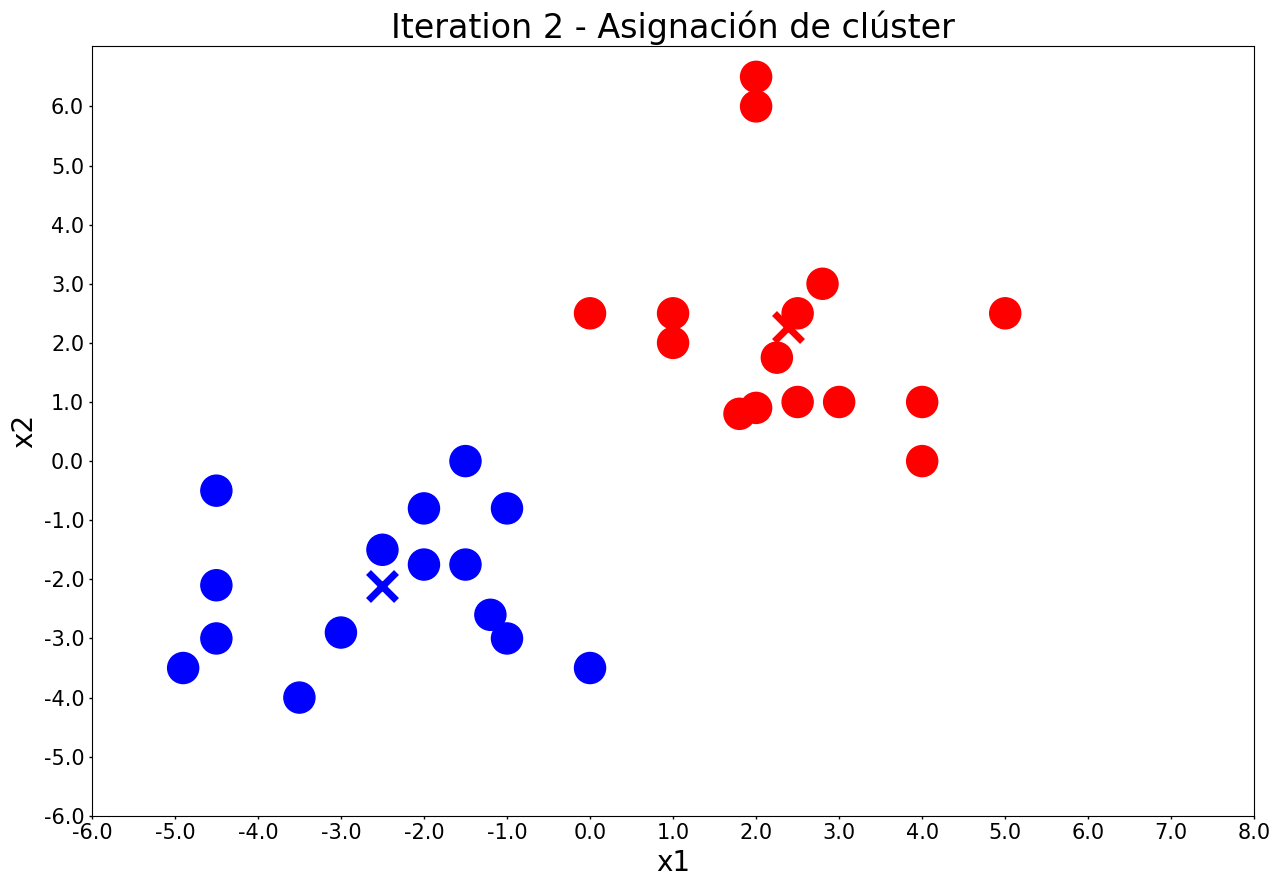

Iteration 2 - Presiona Enter para actualizar los centros 


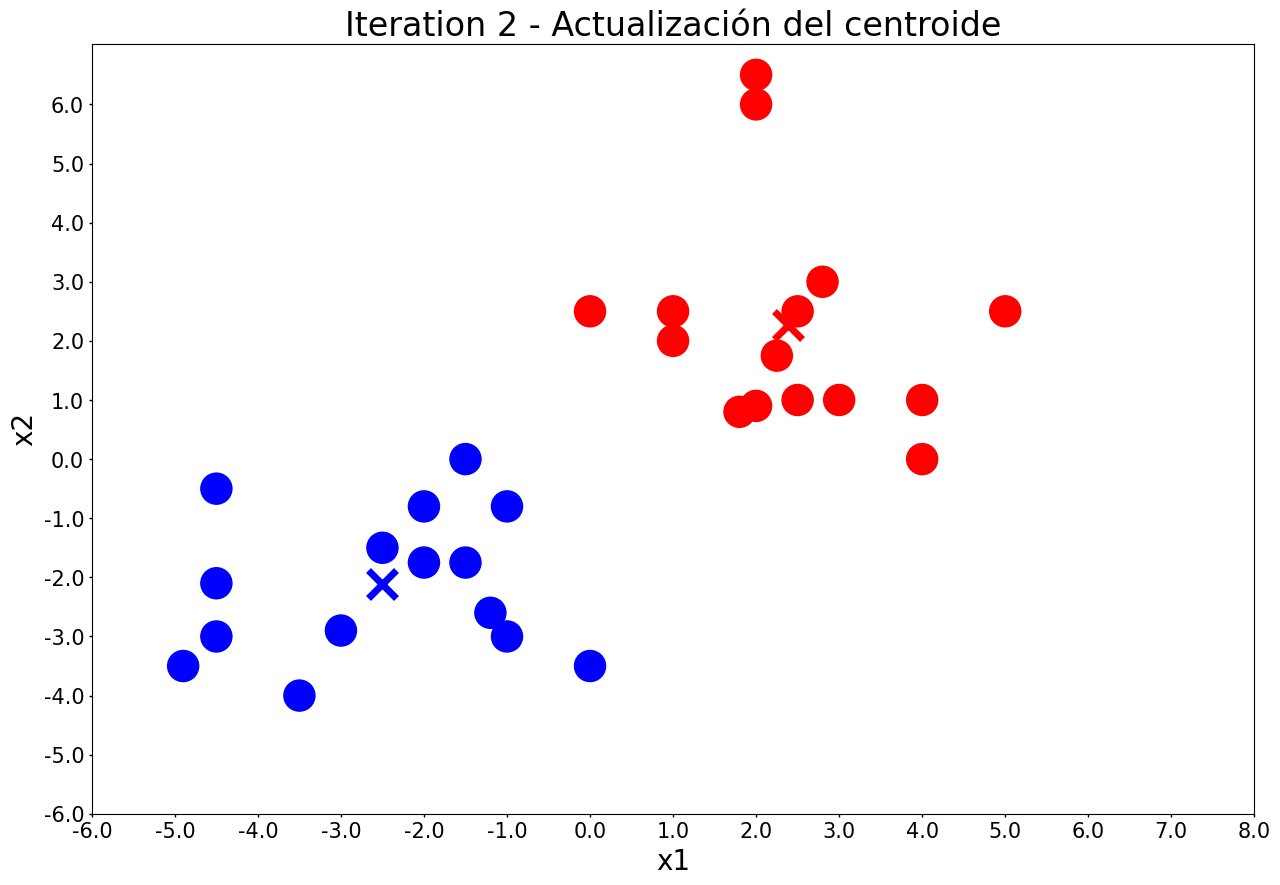

Iteration 3 - Presiona Enter para actualizar los miembros de cada clúster 


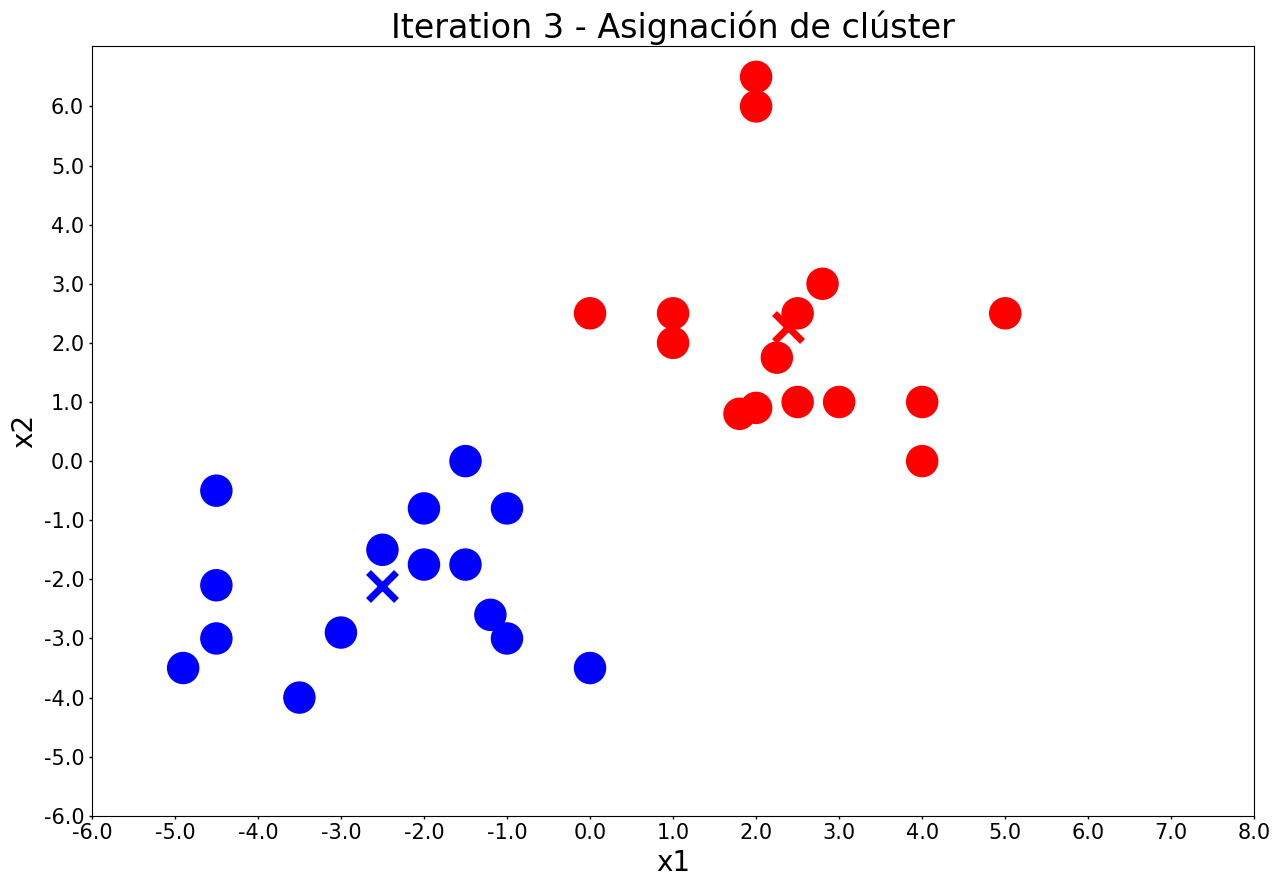

Iteration 3 - Presiona Enter para actualizar los centros 


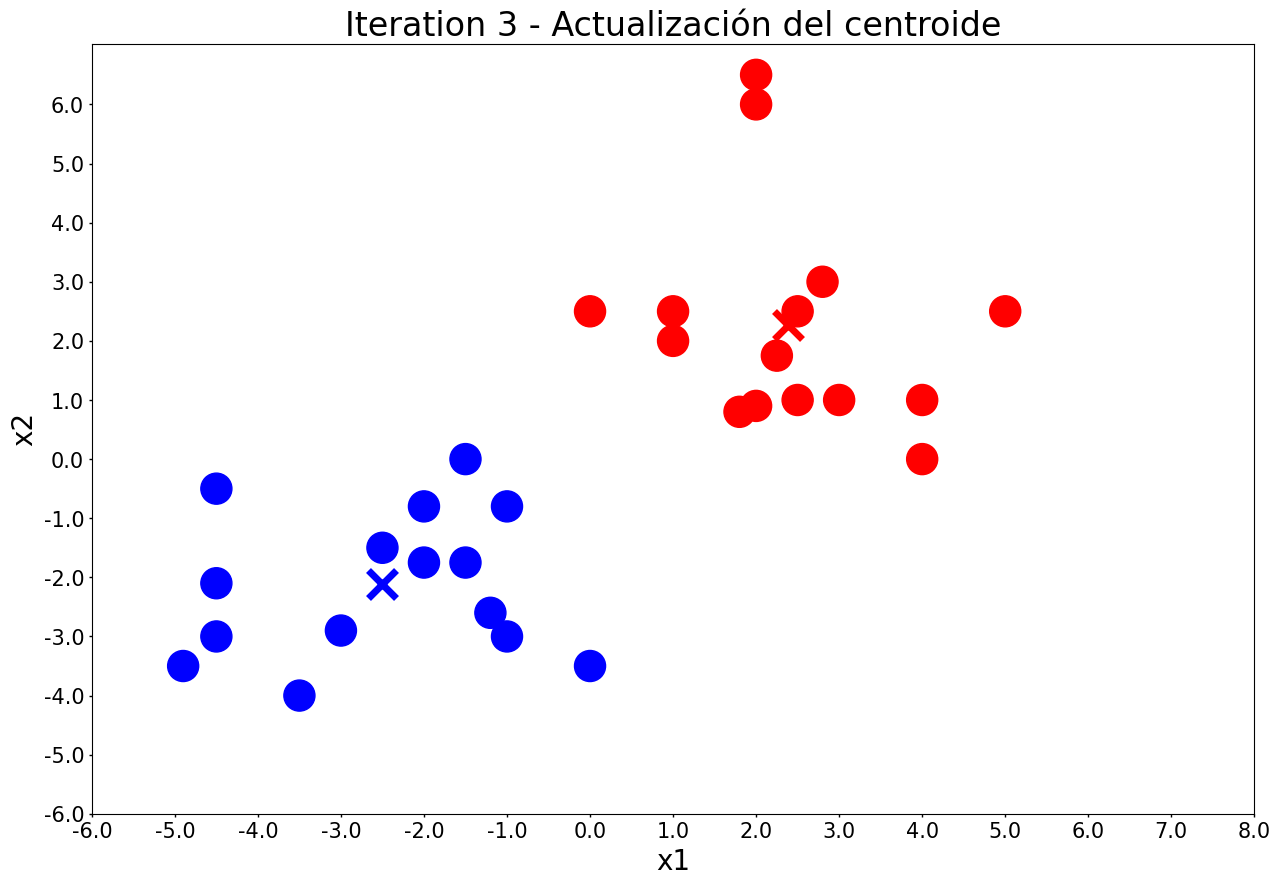

Iteration 4 - Presiona Enter para actualizar los miembros de cada clúster 


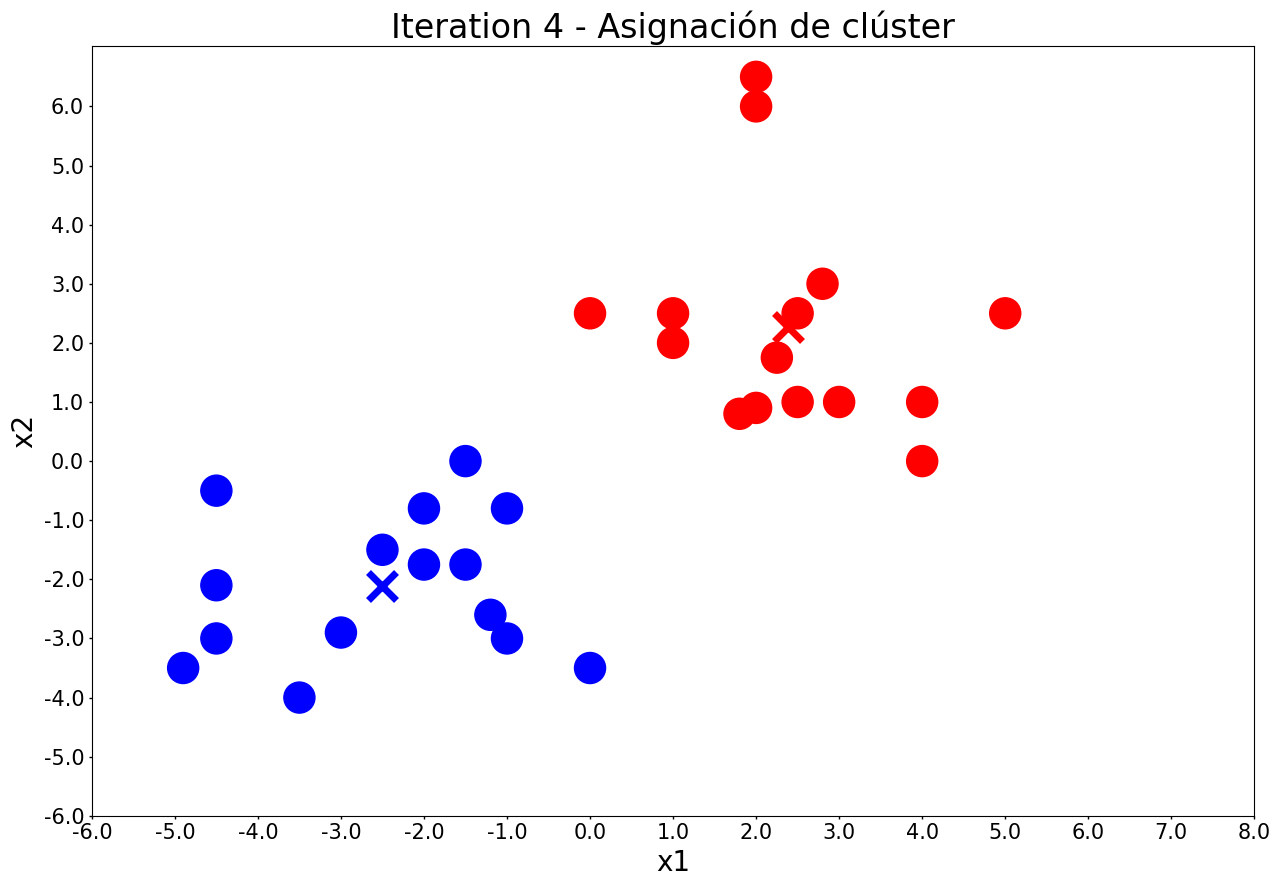

Iteration 4 - Presiona Enter para actualizar los centros 


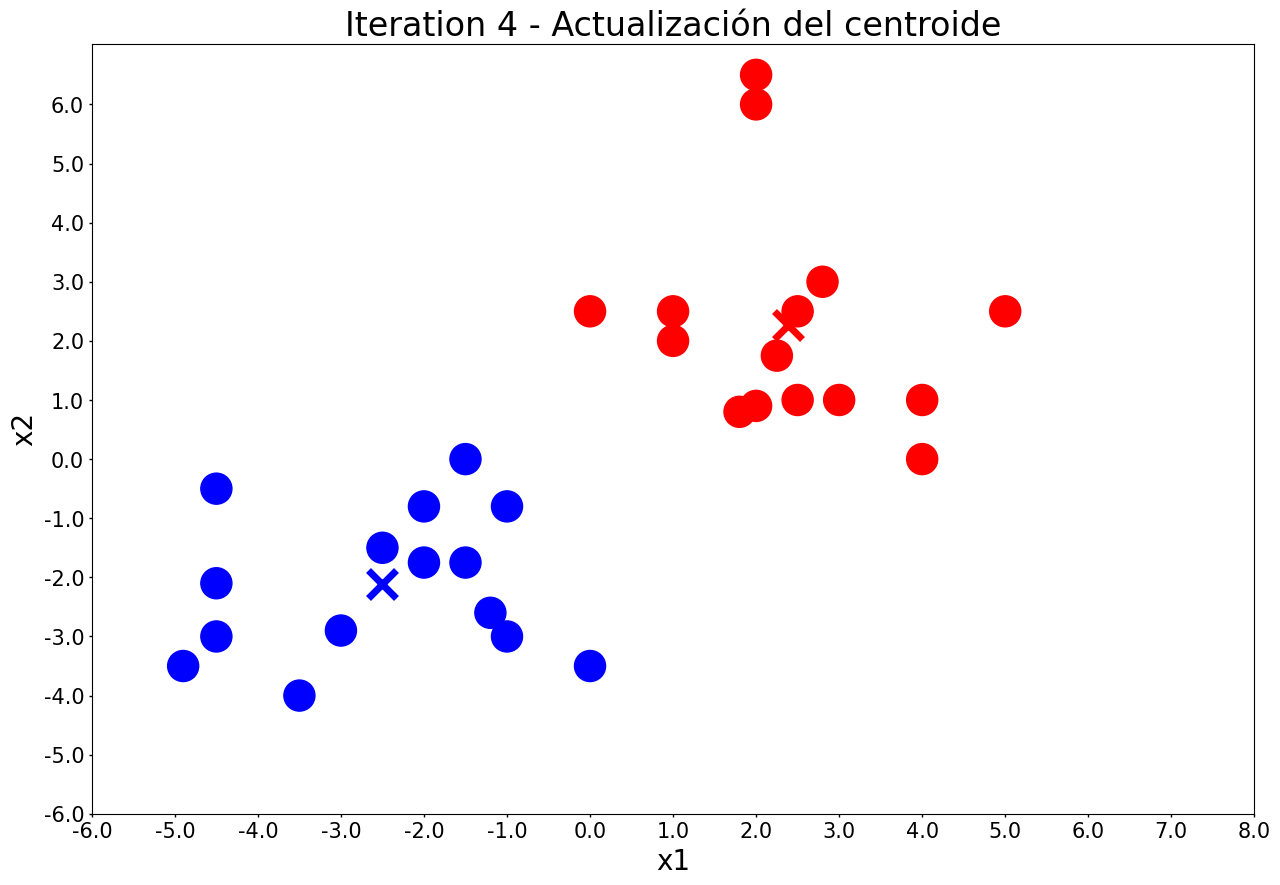

In [36]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Presiona Enter para actualizar los miembros de cada clúster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Asignación de clúster'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Presiona Enter para actualizar los centros'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Actualización del centroide'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

## Hemos observado hasta ahora como trabaja <em>k</em>-means. Veamos otro ejemplo ahora con muchos mas datos. Para esto, utilizaremos la librería <strong>random</strong> para generar miles de datos.


### Generar los Datos


Primero, necesitaremos configurar la semilla aleatoria. Usaremos la función de Numpy **random.seed()** y estableceremos la semilla (seed) en 0. En otras palabras,  **random.seed(0)**.


In [37]:
np.random.seed(0)

A continuación crearemos *agrupaciones aleatorias* de los datos utilizando la clase **make_blobs**. Esta clase puede tomar muchas entradas pero solo usaremos las especificadas.

<b> <u> Entrada </u> </b>

<ul>
    <li> <b>n_samples</b>: Número total de datos divididos equitativamente entre las agrupaciones. </li>
    <ul> <li> El valor sera de: 5000 </li> </ul>
    <li> <b>centers</b>: Número de centros a generar, o las ubicaciones conocidas de estos. </li>
    <ul> <li> El valor sera de: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: Desviación estandar de las agrupaciones. </li>
    <ul> <li> El valor sera de: 0.9 </li> </ul>
</ul>

<b> <u> Salida </u> </b>

<ul>
    <li> <b>X</b>: Arreglo para la forma [n_samples, n_features]. (Matriz de Características)</li>
    <ul> <li> Las muestras generadas. </li> </ul> 
    <li> <b>y</b>: Arreglo para la forma [n_samples]. (Vector de Respuesta)</li>
    <ul> <li> Las etiquetas de enteros para los miembros de las agrupaciones de cada muestra. </li> </ul>
</ul>


In [38]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Mostrar el diagrama de dispersión de los datos generados aleatoriamente.


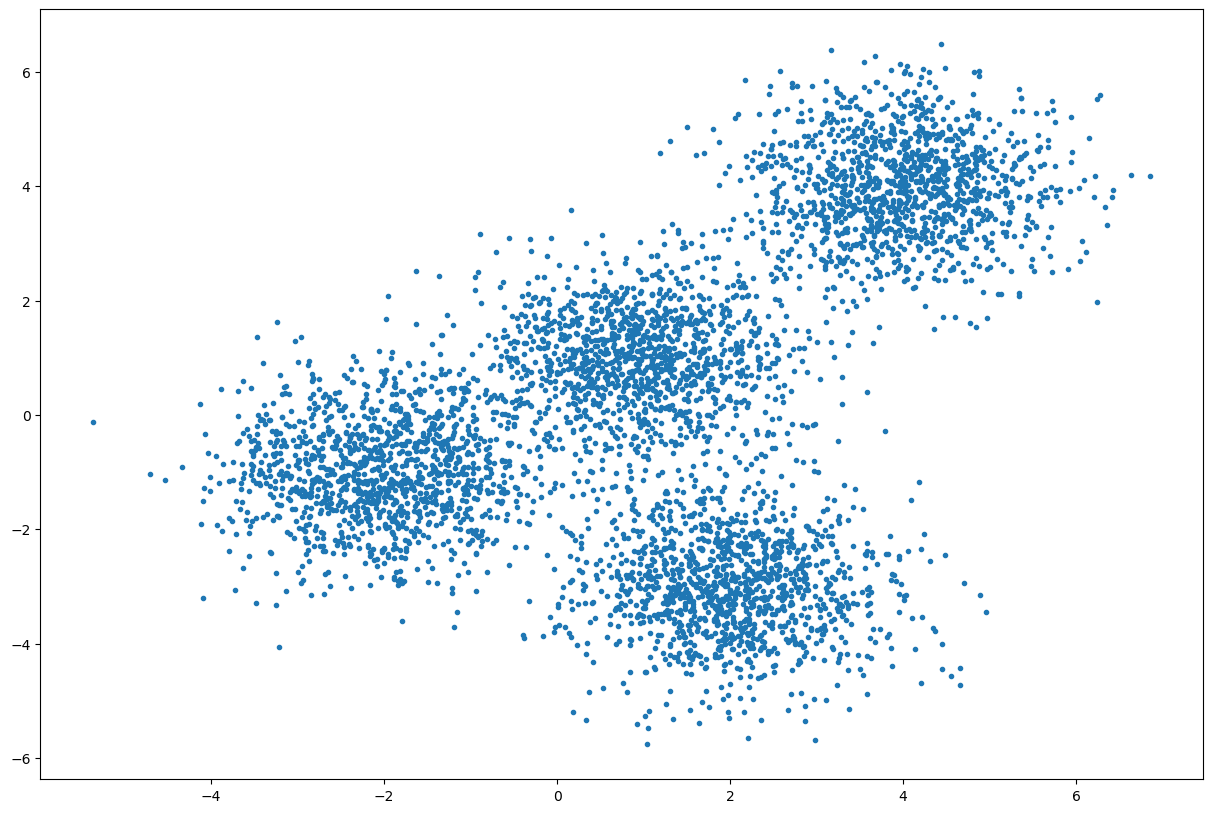

In [39]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

### Configurar *k*-means


Ahora que hemos generado nuestros datos, configuremos la agrupación con *k*-means


La clase KMeans tiene muchos parámetros a usar pero solo utilizaremos los siguientes tres:

<ul>
    <li> <strong>init</strong>: Método para inicializar los centroides. </li>
    <ul>
        <li> El valor será: "k-means++". k-means++ selecciona centros de agrupación iniciales para <em>k</em>-means de una forma inteligente para acelerar la convergencia. </li>
    </ul>
    <li> <strong>n_clusters</strong>: Número de agrupaciones a formar así como el número de centroides a generar. </li>
    <ul> <li>  El valor será: 4 (debido a que tenemos 4 centros)</li> </ul>
    <li> <strong>n_init</strong>: Número de veces que el algoritmo de <em>k</em>-means será ejecutado con distintas semillas de centroides. Los resultados finales eran la mejor salida de n_init ejecuciones consecutivas en términos de inercia. </li>
    <ul> <li> El valor será: 12 </li> </ul>
</ul>

Inicializar KMeans con estos parámetros, donde el parámetro de salida es **k_means**.


In [40]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

Ajustemos el modelo KMeans con la matriz de características <b> X </b> creada anteriormente.


In [41]:
k_means.fit(X)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Tomemos las etiquetas para cada punto del modelo usando el atributo **.labels\_** de KMeans y guardelo como **k_means_labels**.


In [42]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

También tomaremos las coordenadas de los centros de la agrupación utilizando **.cluster_centers\_** de KMeans, las guardaremos como **k_means_cluster_centers**.


In [43]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Visualizar las Agrupaciones Resultantes


Ahora que hemos generado aleatoriamente los datos y el modelo KMeans esta inicializado, grafiquemoslos y veamos como quedó la agrupación.


Lea por favor el siguiente código y los comentarios para entender como graficar el modelo.


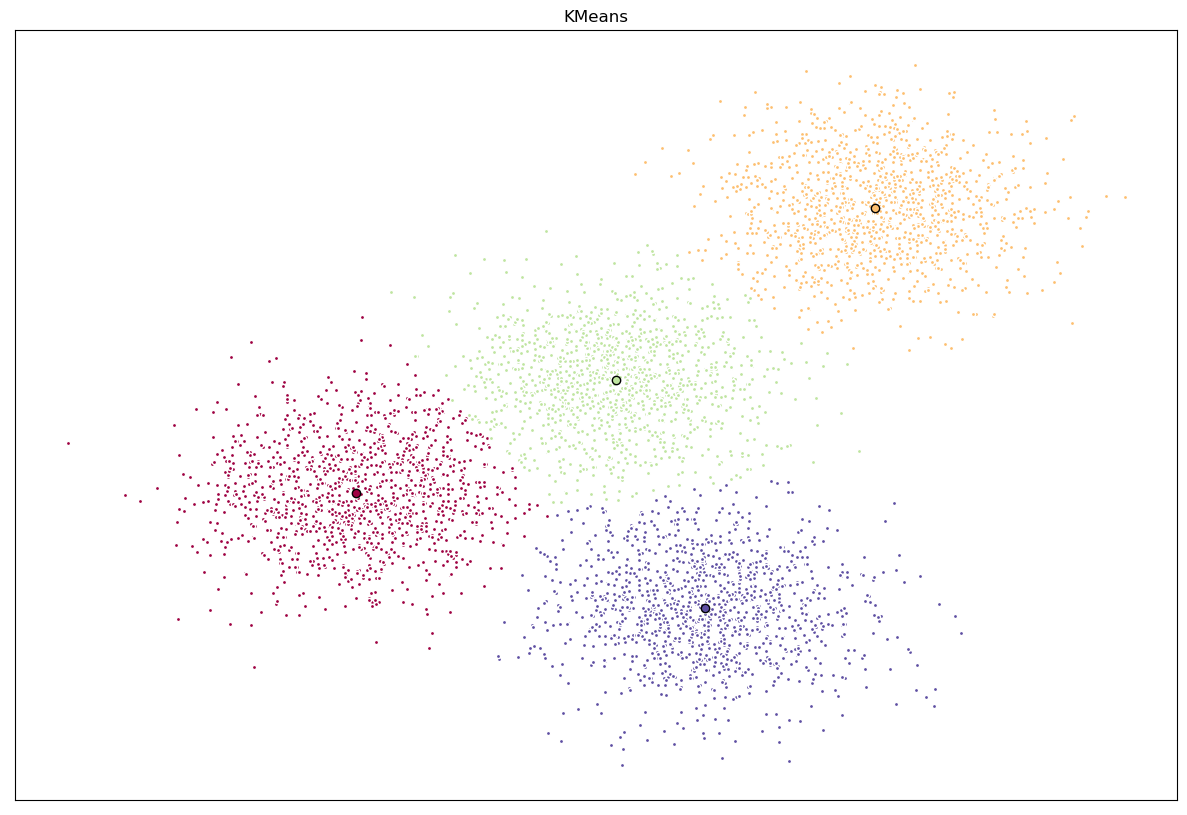

In [44]:
# incializar la gráfica con las dimensiones especificadas.
fig = plt.figure(figsize=(15, 10))

# colors utiliza un mapa de colores, el cual producirá un arreglo de colores con base
# al número de etiqueta. Utilzaremos set(k_means_labels) para obtener las 
# etiquetas unicas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# generar una gráfica
ax = fig.add_subplot(1, 1, 1)

# haga un ciclo a traves de los datos y grafique los puntos y centroides.
# k estará en el rango de 0 a 3 lo cual emparejará el número de agrupaciones en el conjunto de datos.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # crear una lista de todos los puntos, donde los que estan en
    # la agrupación estan etiquetados como verdaderos y los que no
    # como falsos
    my_members = (k_means_labels == k)
    
    # definir el centroide o centro de la agrupación
    cluster_center = k_means_cluster_centers[k]
    
    # graficar los puntos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # graficar los centroides con el color especificado pero con contorno mas oscuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# título de la gráfica
ax.set_title('KMeans')

# remover las marcas del eje x
ax.set_xticks(())

# remover las marcas del eje y
ax.set_yticks(())

# mostrar la gráfica
plt.show()

<a id='item2'></a>


## Usar *k*-means para la Segmentación de Clientes


Imagine que tiene un conjunto de datos sobre un cliente y esta interesado en saber sobre su comportamiento haciendo uso de sus datos hístoricos.

La segmentación de clientes es la práctica de dividir la información de la base de clientes en grupos de individuos con características parecidas. Es una estrategia significativa ya que un negocio puede seleccionar estos grupos de clientes y transladar en base a ellos recursos de marketing. Por ejemplo, un grupo podría contener clientes que se inclinan por las altas ganancias y bajo riesgo, esto es, son mas proclives a comprar productos o suscribirse a algun servicio. La tarea del negocio es mantener estos clientes. Otro grupo podría incluir clientes de organizaciones sin ánimo de lucro, etc.


### Descargar los Datos


Descarguemos los datos y vamos a guardarlos en un archivo CSV llamado **customer_segmentation.csv**


In [45]:
!wget -q -O 'customer_segmentation.csv' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/customer_segmentation.csv
print('Data downloaded!')

Data downloaded!


Ahora que los datos han sido descargados, los pondremos en un dataframe *pandas*.


In [46]:
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre procesado


Como puede observar, en este conjunto de datos **Address** es una variable categórica. El algoritmo k-means no es directamente aplicable a variables categóricas porque la función de la distancia euclidiana no es realmente significativa para variables discretas. Quitemos esta característica para ejecutar el agrupamiento.


In [47]:
df = customers_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalicemos el conjunto de datos. Pero, ¿Por que necesitamos normalizar en primer lugar? La normalización es un método estadístico que ayuda a los algoritmos matemáticos a interpretar características con distintas magnitudes y distribuciones por igual. Usaremos **StandardScaler()** para normalizar el conjunto de datos.


In [48]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modelado


Ejecutemos nuestro modelo y agrupemos nuestros clientes en 3 agrupaciones.


In [49]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 2 0 1 2 2 1 1 1 2 0 1 1 1 0 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 1 2 0 1 1 1 0
 0 1 2 0 2 1 2 1 2 1 1 1 1 2 2 0 1 0 0 0 1 1 1 2 1 2 2 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 2 1 1 0 2 1 2 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 2 1 0 0 2 1 1 1 1 1
 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 0
 1 1 1 2 0 1 1 1 1 2 0 0 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 0 1 1 2 0
 2 1 1 1 1 1 2 1 0 1 1 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 1 1 1 0 0 2 1 1 0 2
 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 0 1 0 1
 1 1 2 1 0 2 0 1 2 1 1 0 1 1 1 1 0 0 0 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 0 1 1
 0 1 0 2 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 2 1 0 1 1 1 0 0 1 1 1 2 0
 1 1 0 1 2 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 0 1 0 1 1 1 2 2 1
 0 1 2 0 0 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 1 1 1 1 1 0 0 1 2 0 2 1 1 0 1 1 2 2 1 0 1 1 2 1 0 1 2 1 1 1 2 1 1 1 1 2
 1 0 1 1 1 1 2 0 1 1 2 1 0 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 0 1 1 1 0 1
 0 1 1 1 1 1 2 0 0 1 2 1 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/jupyterlab/conda/e

<h2 id="insights">Perspectivas</h2>


Observe que cada fila en el conjunto de datos representa un cliente, por consiguiente, a cada fila se le asigna una etiqueta.


In [50]:
df["Labels"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


Podemos revisar facilmente los valores del centroide promediando las características de cada agrupación.


In [51]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


<em>k</em>-means particionará sus clientes en tres grupos debido a que hemos especificado que se generaran 3 agrupaciones. Los clientes en cada agrupación son parecidos entre ellos en términos de las características incluidas en el conjunto de datos.

Ahora podemos generar un perfil para cada grupo, considerando las características comunes de cada agrupación. Por ejemplo, las 3 agrupaciones pueden ser:

Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   OLDER, HIGH INCOME, E INDEBTED
*   MIDDLE AGED, MIDDLE INCOME, Y FINANCIALLY RESPONSIBLE
*   YOUNG, LOW INCOME, E INDEBTED


Sin embargo usted puede idear sus propios perfiles basandose en las medias de arriba y proponer etiquetas que considere mejor describen a la agrupación.


Espero que haya podido ver el poder de *k*-means. Este algoritmo de agrupación nos ofrece perspectivas interesantes del conjunto de datos y nos permitió agrupar los datos en tres agrupaciones. Quiza se hubiera alcanzado los mismos resultados con multiples pruebas y experimentos.


### Gracias por terminar este laboratorio

Este cuaderno fue creado por [Saeed Aghabozorgi](https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0701ESCoursera21685115-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) y [Alex Aklson](https://www.linkedin.com/in/aklson?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0701ESCoursera21685115-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Esperamos que haya encontrado este laboratorio de su interes y educativo. Tómese la libertad de contactar conmigo para cualquier duda o aclaración.


Este cuaderno forma parte del curso en **Coursera** llamado *Applied Data Science Capstone*. Si accede a este cuaderno desde afuera del curso, puede tomarlo en línea haciendo clic [aquí](http://cocl.us/DP0701EN_Coursera_Week3\_LAB1).


<hr>

Copyright © 2018 [Cognitive Class](https://cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0701ESCoursera21685115-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
